In [1]:
import math
from IPython.display import Image
from graphviz import Digraph

In [2]:
from labCode import *

### Floyd-Warshall algorithm implementation

In [3]:
def FW(G):
    #initialise the distance matrix (distance) with infinite values
    n = len(G.vertices)
    distance = [[math.inf for null in range(n)] for null in range(n)]

    #initialise distance from a node to itself as 0
    for i in range(n):
        distance[i][i] = 0
    
    #initialise distances for each node in graph as weight of edge
    for u in G.vertices:
        for v, wt in u.getOutNeighborsWithWeights():
            distance[int(u.value)][int(v.value)] = wt
    
    #compute shortest distance from each vertex to all others
    for k in range(n):
        #iterate over all vertices i
        for i in range(n):
            #iterate over all destination vertices j for vertex i
            for j in range(n):
                #if vertex k is part of the shortest path from vertex i to vertex j, distance is updated
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
                #print("Distance from node " + str(i) + " to " + str(j) + " = " + str(distance[i][j]))

        #if a distance from a node to itself is less than 0 it must be a negative cycle
        if any(distance[i][i] < 0 for i in range(n)):
            print("Negative weight cycle present")
            return

    #return matrix of distances
    return distance

### Test 1: Basic graph with positive and negative weights

In [4]:
G1 = Graph()
for i in ['0', '1', '2', '3', '4', '5']:
    G1.addVertex( Node(i) )

In [5]:
V = G1.vertices

G1.addDiEdge( V[0], V[1],  8) 
G1.addDiEdge( V[0], V[2], 10) 
G1.addDiEdge( V[1], V[3],  1) 
G1.addDiEdge( V[3], V[2], -4) 
G1.addDiEdge( V[2], V[5],  2)
G1.addDiEdge( V[4], V[2],  1) 
G1.addDiEdge( V[3], V[5], -1)
G1.addDiEdge( V[5], V[4], -2) 

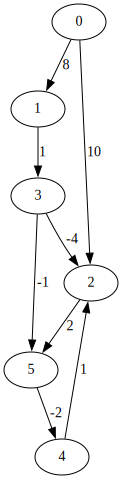

In [6]:
D1 = Digraph()

D1.edge('0', '1', label =  '8')
D1.edge('0', '2', label = '10')
D1.edge('1', '3', label =  '1')
D1.edge('3', '2', label = '-4')
D1.edge('2', '5', label =  '2')
D1.edge('4', '2', label =  '1')
D1.edge('3', '5', label = '-1')
D1.edge('5', '4', label = '-2')

D1

In [7]:
FW(G1)

[[0, 8, 5, 9, 5, 7],
 [inf, 0, -3, 1, -3, -1],
 [inf, inf, 0, inf, 0, 2],
 [inf, inf, -4, 0, -4, -2],
 [inf, inf, 1, inf, 0, 3],
 [inf, inf, -1, inf, -2, 0]]

### Test 2: Negative weight cycle

In [8]:
G2 = Graph()
for i in ['0', '1', '2', '3', '4', '5']:
    G2.addVertex( Node(i) )

In [9]:
V = G2.vertices

G2.addDiEdge( V[0], V[1],  8)
G2.addDiEdge( V[0], V[2], 10)
G2.addDiEdge( V[1], V[3],  1) 
G2.addDiEdge( V[3], V[2], -4) 
G2.addDiEdge( V[2], V[5], -2)
G2.addDiEdge( V[4], V[2], -1) 
G2.addDiEdge( V[3], V[5], -1)
G2.addDiEdge( V[5], V[4], -2)

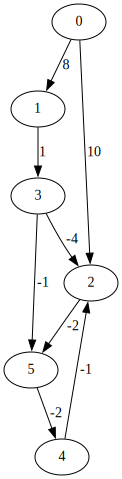

In [10]:
D2 = Digraph()

D2.edge('0', '1', label =  '8')
D2.edge('0', '2', label = '10')
D2.edge('1', '3', label =  '1')
D2.edge('3', '2', label = '-4')
D2.edge('2', '5', label = '-2')
D2.edge('4', '2', label = '-1')
D2.edge('3', '5', label = '-1')
D2.edge('5', '4', label = '-2')

D2

In [11]:
FW(G2)

Negative weight cycle present
